# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
     # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Plettenberg Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=plettenberg%20bay
Processing Record 2 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=hilo
City not found. Skipping...
Processing Record 3 | Yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=yerbogachen
Processing Record 4 | Asyut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=asyut
Processing Record 5 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=norman%20wells
Processing Record 6 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=punta%20arenas
Processing Record 7 | Kikwit


Processing Record 56 | Turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=turukhansk
Processing Record 57 | Mantua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=mantua
City not found. Skipping...
City not found. Skipping...
Processing Record 58 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=mount%20gambier
Processing Record 59 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=touros
Processing Record 60 | Gobabis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=gobabis
Processing Record 61 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=new%20norfolk
Processing Record 62 | Cape Town
http://api.openweathermap.org/dat

Processing Record 111 | Arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=arlit
Processing Record 112 | Veraval
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=veraval
City not found. Skipping...
Processing Record 113 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=anadyr
Processing Record 114 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=talnakh
Processing Record 115 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=airai
Processing Record 116 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=tautira
Processing Record 117 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8

Processing Record 168 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=geraldton
Processing Record 169 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=chokurdakh
City not found. Skipping...
Processing Record 170 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=ostrovnoy
Processing Record 171 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=makakilo%20city
Processing Record 172 | Zernograd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=zernograd
Processing Record 173 | Paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=paita
City not found. Skipping...
Processing Record 174 | Murray Bridge
http://api.openweath

Processing Record 221 | Acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=acajutla
Processing Record 222 | Alice Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=alice%20springs
Processing Record 223 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=hasaki
Processing Record 224 | Dindori
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=dindori
Processing Record 225 | Carroll
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=carroll
City not found. Skipping...
Processing Record 226 | Montrose
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=montrose
Processing Record 227 | Belokurikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 276 | Masuguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=masuguru
Processing Record 277 | Janow Lubelski
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=janow%20lubelski
Processing Record 278 | Shambu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=shambu
Processing Record 279 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=saldanha
Processing Record 280 | Shahreza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=shahreza
Processing Record 281 | Hokota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=hokota
Processing Record 282 | Guatire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8

Processing Record 332 | Aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=aksu
Processing Record 333 | Nizhniy Lomov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=nizhniy%20lomov
Processing Record 334 | Muroto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=muroto
Processing Record 335 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=srednekolymsk
Processing Record 336 | Outjo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=outjo
Processing Record 337 | Kortkeros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=kortkeros
Processing Record 338 | Rabo de Peixe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f14

Processing Record 387 | Medina del Campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=medina%20del%20campo
Processing Record 388 | Kurchum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=kurchum
Processing Record 389 | Macae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=macae
Processing Record 390 | Mahanoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=mahanoro
City not found. Skipping...
Processing Record 391 | Seminole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=seminole
City not found. Skipping...
Processing Record 392 | Leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=leh
Processing Record 393 | Chavakkad
http://api.openweathermap.org/data/2.5

Processing Record 442 | Indramayu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=indramayu
Processing Record 443 | Golden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=golden
Processing Record 444 | Korcula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=korcula
Processing Record 445 | Praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=praya
Processing Record 446 | Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=chuy
Processing Record 447 | Nuevo Progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=nuevo%20progreso
Processing Record 448 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&

Processing Record 497 | Adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=adrar
Processing Record 498 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=sioux%20lookout
Processing Record 499 | Mulege
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=mulege
Processing Record 500 | Kabanjahe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=kabanjahe
Processing Record 501 | Blyth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=blyth
Processing Record 502 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=ixtapa
Processing Record 503 | Deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036

Processing Record 552 | Abilene
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=abilene
Processing Record 553 | Bozoum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=bozoum
Processing Record 554 | Grand Forks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=grand%20forks
Processing Record 555 | Sevsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d7ec3e122241f5f141c01c8820d2036&q=sevsk


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [5]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Plettenberg Bay,13,ZA,1577477384,83,-34.05,23.37,60.03,10.54
1,Hilo,1,US,1577477386,61,19.71,-155.08,80.60,8.72
2,Yerbogachen,95,RU,1577477133,97,61.28,108.01,-23.53,2.42
3,Asyut,0,EG,1577477388,56,27.18,31.19,53.60,11.41
4,Norman Wells,90,CA,1577477389,75,65.28,-126.83,-18.40,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

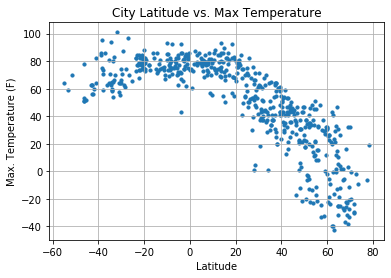

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

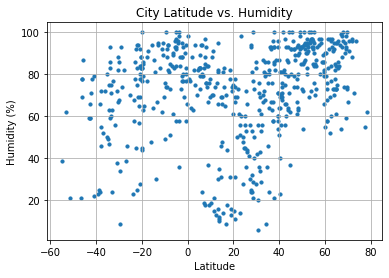

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

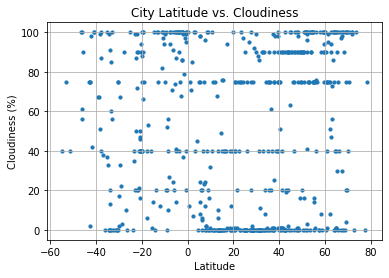

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

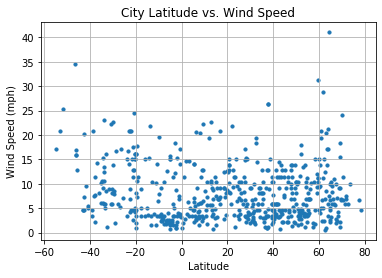

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()